In [216]:
import importlib
import PreProcessMetadata
import PreProcess_NLP
import KG
import pathlib
from rdflib import Graph, Literal, RDF, URIRef

In [217]:
importlib.reload(KG)

<module 'KG' from 'C:\\Users\\Jana\\LabCode\\KG.py'>

In [4]:
#Angabe allgemeiner Parameter zum Ausführen der Funktionen (einmalig)
pdf_path = ('C:/Users/Jana/LabCode/PDF')
p = pathlib.Path(pdf_path)
files_path = list(p.glob('*.pdf'))

pdf_path_conference = ('C:/Users/Jana/LabCode/AimsAndScope')
p_conference = pathlib.Path(pdf_path_conference)
files_path_conference = list(p_conference.glob('*.pdf'))

path = 'C:/Users/Jana/LabCode/'

In [5]:
#Aufrufe aus PreProcessMetadata
df_pdf_meta = PreProcessMetadata.read_paper_meta(path) #Einlesen der PDF's

In [4]:
#muss nur ausgeführt werden, falls neue paper/Konferenzen dazu kommen
PreProcessMetadata.write_paper_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (paper)
PreProcessMetadata.write_conference_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (Konferenzen)

In [6]:
#Aufrufe aus PreProcess_NLP
corpus = PreProcess_NLP.build_corpus(files_path) #Bildung des Textcorpus aus papern
conference_corpus = PreProcess_NLP.build_conference(files_path_conference) #Bildung des Textcorpus aus Konferenzen
keyword_list, conference_list = PreProcess_NLP.generate_keywords(corpus, conference_corpus) #Generierung keywords

In [242]:
#Initialerstellung Graph
G_KG = Graph()
G_KG = KG.get_entity_rel(df_pdf_meta, G_KG, keyword_list, conference_list)#Erstellung Inhalt Graph
G_KG.serialize(destination="G_KG.ttl")

<Graph identifier=N35a0eb527d064ae88190d37b9850217f (<class 'rdflib.graph.Graph'>)>

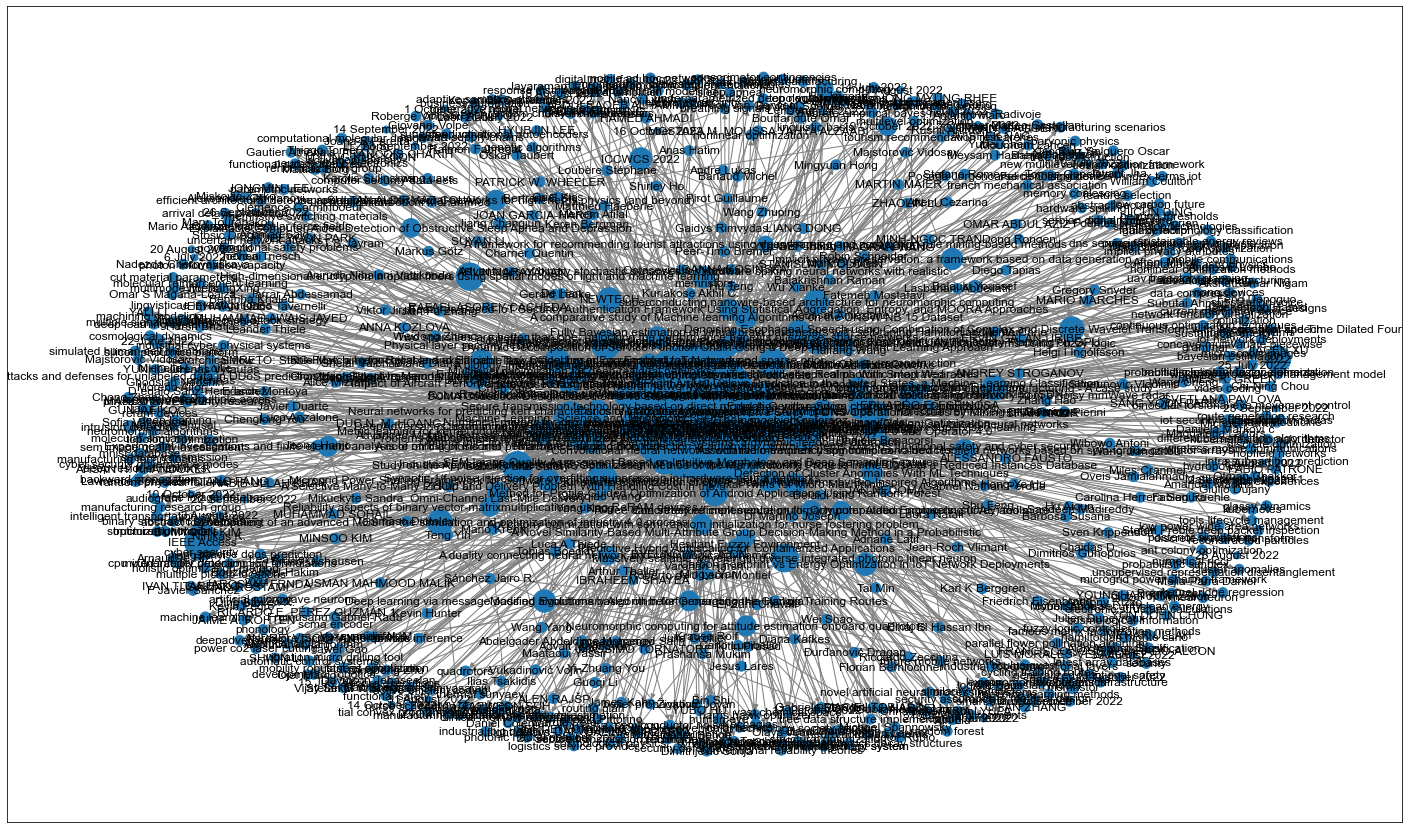

In [238]:
#Anzeigen des Graphen
KG.show_graph(G_KG)

In [239]:
#Suche ob bestimmte Subjekte, Prädiakte oder Objekte im Graph enthalten sind.
sub = Literal('Audiogram Digitization Tool for Audiological Reports')
obj = ''
praed = ''
if (sub, None, None) in G_KG:
    print("This graph contains triples about", sub,obj,praed)

This graph contains triples about Audiogram Digitization Tool for Audiological Reports  


In [245]:
#Abfrage Variable (mit voranstehendem ?) ist frei wählbar und gibt die Ausgabevariable an
#Abfragereihenfolge: Subjekt Prädikat Objekt
#
query = """
SELECT ?conference 
WHERE {
  	"ICCWCS 2022" ns1:subject ?conference .  
    }
"""

erg = G_KG.query(query)
for row in erg:
    print('Ergebnisliste:', f'{row.conference}')

Ergebnisliste: antennas
